# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Видим, что данные приведены к типам, неоправданно затратным по памяти. Исправим это.

In [4]:
data['Пол'] = pd.to_numeric(data['Пол'], downcast='integer')
data['Возраст'] = pd.to_numeric(data['Возраст'], downcast='integer')
data['Зарплата'] = pd.to_numeric(data['Зарплата'], downcast='integer')
data['Члены семьи'] = pd.to_numeric(data['Члены семьи'], downcast='integer')
data['Страховые выплаты'] = pd.to_numeric(data['Страховые выплаты'], downcast='integer')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int8   
 1   Возраст            5000 non-null   int8   
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int8   
 4   Страховые выплаты  5000 non-null   int8   
dtypes: float64(1), int8(4)
memory usage: 58.7 KB


Нам удалось сократить использование памяти почти в 4 раза!    

А теперь стоит взглянуть на распределения этих данных.

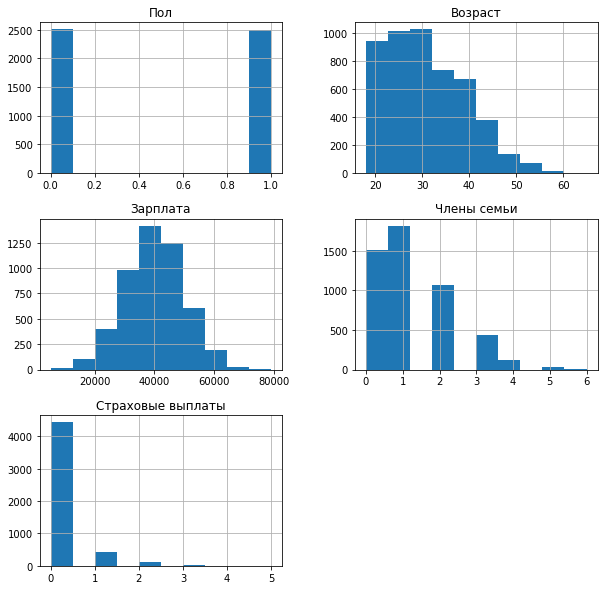

In [6]:
data.hist(figsize=(10,10))
plt.show()

Никаких аномалий не обнаружено.

После проведения небольших корректировок и осмотра можем сделать вывод, что данные готовы к работе.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Задание:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** не изменится

**Обоснование:**

Используем свойства матричных преобразований:
$$
(AB)^T = B^T A^T   (1)
$$
$$
(AB)^{-1} = B^{-1} A^{-1}   (2)
$$

  
Домнажаем матрицу признаков $X$ на обратимую матрицу $P$ и подставим результат в формулу обучения:
$$
w_{new} = ((XP)^T (XP))^{-1} (XP)^T y
$$

Применим свойство (1):
$$
w_{new} = (P^T X^T X P)^{-1} P^T X^T y
$$

Применим свойство (2):
$$
w_{new} =(P^T\cdot  X^T\cdot  X\cdot  P)^{-1} P^T X^T y
$$

$$
w_{new} =(P^T\cdot (X^T  X)\cdot  P)^{-1} P^T X^T y
$$

$$
w_{new} = P^{-1} \cdot (X^T  X)^{-1} \cdot (P^T)^{-1} P^T X^T y
$$

Можнo заметить, что $(P^T)^{-1} P^T = E$, тогда формула примет вид:
$$
w_{new} = P^{-1} (X^T X)^{-1} X^T y
$$

Заменим формулу на w и получим:
$$
w_{new} = P^{-1} w
$$

Так как веса линейной регрессии связаны, то качество модели, определяемое коэффициентом детерминации $R2$, не изменится.  
**Модель будет давать такие же предсказания, качество не изменится.**

Подставим в формулу предсказаний $a = Xw$ матрицу $X_{new} = XP$ и признаки $w_{new}:$
$$
a_{new} = X P w_{new}
\\
a_{new} = X P P^{-1} w
\\
a_{new} = X w = a
$$


## Алгоритм преобразования

**Задание:** Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

**Алгоритм:**

1. Создание случайной матрицы $P$ размером $(n\ x\ n)$ для матрицы с данными $X$ размером $(m\ x\ n)$.

    
2. Проверка созданной матрицы на обратимость.

    - Матрица обратима - идём дальше.
    
    - Матрица необратима - пересоздаём её.
    
    
3. Сохранение матриц $P,\ P^{-1}$ для шифровки и расшифровки данных.

    
4. Шифрование данных с помощью умножения $X$ на $P$.

    
5. Проверка возможности расшифроки данных с помощью ключа $P^{-1}$.


**Обоснование:**

Работоспособность данного алгоритма преобразования данных уже была доказана выше, в пункте 2.  
Данный алгоритм в теории позволяет зашифровать данные, не исказив при этом качество линейной регрессии.  
Давайте убедимся в этом на практике.

## Проверка алгоритма

In [7]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [8]:
features = data.drop(columns='Страховые выплаты', axis=1)
target = data['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=42, test_size=0.3)

### До преобразования

In [9]:
linreg = LinearRegression()
linreg.fit(features_train, target_train)
predictions = linreg.predict(features_test)
r2_before = r2_score(target_test, predictions)
f'R2-score до преобразования данных: {r2_before}'

'R2-score до преобразования данных: 0.42269996944607224'

### После преобразования

In [10]:
n = features.shape[1]
flag = False

while flag == False:
    try:
        P_matrix = np.random.randint(1, 5, size=(n, n))
        P_matrix_reversed = np.linalg.inv(P_matrix)
        flag = True
    except:
        flag = False

In [11]:
P_matrix

array([[4, 3, 4, 1],
       [2, 1, 2, 2],
       [2, 4, 4, 3],
       [4, 3, 4, 3]])

In [12]:
P_matrix_reversed

array([[-2.5000000e-01, -1.0000000e+00, -5.0000000e-01,  1.2500000e+00],
       [-5.0000000e-01, -2.0000000e+00, -8.8817842e-17,  1.5000000e+00],
       [ 1.0000000e+00,  2.5000000e+00,  5.0000000e-01, -2.5000000e+00],
       [-5.0000000e-01,  0.0000000e+00,  0.0000000e+00,  5.0000000e-01]])

In [13]:
pd.DataFrame(features @ P_matrix).head()

,0,1,2,3
0,99290.0,198447.0,198490.0,148886.0
1,76096.0,152049.0,152096.0,114095.0
2,42058.0,84029.0,84058.0,63058.0
3,83450.0,166827.0,166850.0,125148.0
4,52260.0,104431.0,104460.0,78357.0


In [14]:
features_train = features_train.dot(P_matrix)
features_test = features_test.dot(P_matrix)

In [15]:
linreg = LinearRegression()
linreg.fit(features_train, target_train)
predictions = linreg.predict(features_test)
r2_after = r2_score(target_test, predictions)
f'R2-score после преобразования данных: {r2_after}'

'R2-score после преобразования данных: 0.422699722173258'

In [16]:
r2_before, r2_after

(0.42269996944607224, 0.422699722173258)

Как видим, алгоритм преобразования оказался полностью работоспособным и не оказал значимого влияния на работу линейной регрессии.